## Youtube revenue EDA


### Import Necessary Libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.concat((pd.read_csv("Table data 2018.csv")[1:],
                pd.read_csv("Table data 2019.csv")[1:-1],
                pd.read_csv("Table data 2020.csv")[1:-1])).reset_index(drop=True)

In [3]:
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.0
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.0,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.0
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.0
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.0


In [4]:
df.shape

(1133, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  1133 non-null   object 
 1   Av­er­age views per view­er           1133 non-null   float64
 2   Unique view­ers                       1133 non-null   float64
 3   Im­pres­sions click-through rate (%)  1133 non-null   float64
 4   Im­pres­sions                         1133 non-null   float64
 5   Com­ments ad­ded                      1133 non-null   float64
 6   Shares                                1133 non-null   float64
 7   Likes (vs. dis­likes) (%)             1096 non-null   float64
 8   Dis­likes                             1133 non-null   float64
 9   Sub­scribers lost                     1133 non-null   float64
 10  Sub­scribers gained                   1133 non-null   float64
 11  Likes            

In [6]:
df.columns

Index(['Date', 'Av­er­age views per view­er', 'Unique view­ers',
       'Im­pres­sions click-through rate (%)', 'Im­pres­sions',
       'Com­ments ad­ded', 'Shares', 'Likes (vs. dis­likes) (%)', 'Dis­likes',
       'Sub­scribers lost', 'Sub­scribers gained', 'Likes',
       'Av­er­age per­cent­age viewed (%)', 'Videos pub­lished',
       'Videos ad­ded', 'Sub­scribers', 'Views', 'Watch time (hours)',
       'Av­er­age view dur­a­tion', 'Your es­tim­ated rev­en­ue (USD)'],
      dtype='object')

In [7]:
df.dtypes

Date                                     object
Av­er­age views per view­er             float64
Unique view­ers                         float64
Im­pres­sions click-through rate (%)    float64
Im­pres­sions                           float64
Com­ments ad­ded                        float64
Shares                                  float64
Likes (vs. dis­likes) (%)               float64
Dis­likes                               float64
Sub­scribers lost                       float64
Sub­scribers gained                     float64
Likes                                   float64
Av­er­age per­cent­age viewed (%)       float64
Videos pub­lished                       float64
Videos ad­ded                           float64
Sub­scribers                            float64
Views                                   float64
Watch time (hours)                      float64
Av­er­age view dur­a­tion                object
Your es­tim­ated rev­en­ue (USD)        float64
dtype: object

In [8]:
col_map ={'Av­er­age views per view­er':'Average_views_per_viewer',
          'Unique view­ers':'Unique_viewers',
          'Av­er­age per­cent­age viewed (%)':'Average_viewed',
          'Im­pres­sions':'Impressions',
          'Dis\xadlikes':'Dislikes',
          'Sub­scribers lost':'Subscribers_lost',
          'Sub­scribers gained':'Subscribers_gained',
          'Videos pub­lished':'Videos_published',
          'Videos ad­ded':'Videos_added', 
          'Sub­scribers':'Subscribers',
          'Im­pres­sions click-through rate (%)':'Click_rate',
          'Com­ments ad­ded':'Comments',
          'Watch time (hours)':'Watch_hours',
          'Av­er­age view dur­a­tion':'Average_view_sec',
          'Your es­tim­ated rev­en­ue (USD)':'Revenue',
           'Likes (vs. dis­likes) (%)':'Likes_(vs_dislikes)'}

In [9]:
df=df.rename(columns=col_map)

In [10]:
df=df.drop(['Videos_added','Likes_(vs_dislikes)'],axis=1)

In [11]:
df.isnull().sum()

Date                          0
Average_views_per_viewer      0
Unique_viewers                0
Click_rate                    0
Impressions                   0
Comments                      0
Shares                        0
Dislikes                      0
Subscribers_lost              0
Subscribers_gained            0
Likes                         0
Average_viewed                0
Videos_published            142
Subscribers                   0
Views                         0
Watch_hours                   0
Average_view_sec              0
Revenue                       0
dtype: int64

In [12]:
df.shape

(1133, 18)

#### Data Cleaning

In [13]:
df.select_dtypes(include=['object']).head(2)

,Date,Average_view_sec
0,2018-08-21,0:01:51
1,2018-08-22,0:01:33


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Average_view_sec'] = pd.to_timedelta(df['Average_view_sec']).dt.seconds
df

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Subscribers_lost,Subscribers_gained,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,0.0,5.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.000
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,2.0,6.0,4.0,44.58,NaN,4.0,37.0,0.9575,93,0.000
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,0.0,0.0,2.0,5.0,38.75,NaN,2.0,26.0,0.5849,80,0.000
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,0.0,0.0,0.0,0.0,24.81,NaN,0.0,8.0,0.1152,51,0.000
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,0.0,0.0,1.0,0.0,45.50,NaN,1.0,17.0,0.4491,95,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2021-09-22,2.2721,105872.0,4.04,4376635.0,546.0,399.0,195.0,972.0,2781.0,10594.0,25.75,0.0,1809.0,240554.0,19512.3516,292,126.600
1129,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,312.0,1221.0,2953.0,34422.0,30.35,1.0,1732.0,408582.0,19855.7704,174,163.558
1130,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,521.0,1520.0,4804.0,56677.0,47.81,1.0,3284.0,652105.0,54463.2654,300,397.066
1131,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,276.0,1112.0,3555.0,18458.0,41.24,0.0,2443.0,358868.0,26757.4077,268,178.664


In [15]:
df.dtypes

Date                        datetime64[ns]
Average_views_per_viewer           float64
Unique_viewers                     float64
Click_rate                         float64
Impressions                        float64
Comments                           float64
Shares                             float64
Dislikes                           float64
Subscribers_lost                   float64
Subscribers_gained                 float64
Likes                              float64
Average_viewed                     float64
Videos_published                   float64
Subscribers                        float64
Views                              float64
Watch_hours                        float64
Average_view_sec                     int64
Revenue                            float64
dtype: object

### Handling null values

In [16]:
df['Videos_published'].value_counts(dropna=False)

0.0    869
NaN    142
1.0    120
3.0      1
2.0      1
Name: Videos_published, dtype: int64

In [17]:
df['Videos_published'].fillna(df['Videos_published'].mode().iloc[0], inplace=True)

In [18]:
df.isnull().sum()

Date                        0
Average_views_per_viewer    0
Unique_viewers              0
Click_rate                  0
Impressions                 0
Comments                    0
Shares                      0
Dislikes                    0
Subscribers_lost            0
Subscribers_gained          0
Likes                       0
Average_viewed              0
Videos_published            0
Subscribers                 0
Views                       0
Watch_hours                 0
Average_view_sec            0
Revenue                     0
dtype: int64

### Exploratory Data Analysis

In [19]:
df.columns

Index(['Date', 'Average_views_per_viewer', 'Unique_viewers', 'Click_rate',
       'Impressions', 'Comments', 'Shares', 'Dislikes', 'Subscribers_lost',
       'Subscribers_gained', 'Likes', 'Average_viewed', 'Videos_published',
       'Subscribers', 'Views', 'Watch_hours', 'Average_view_sec', 'Revenue'],
      dtype='object')

#### Revenue by Date

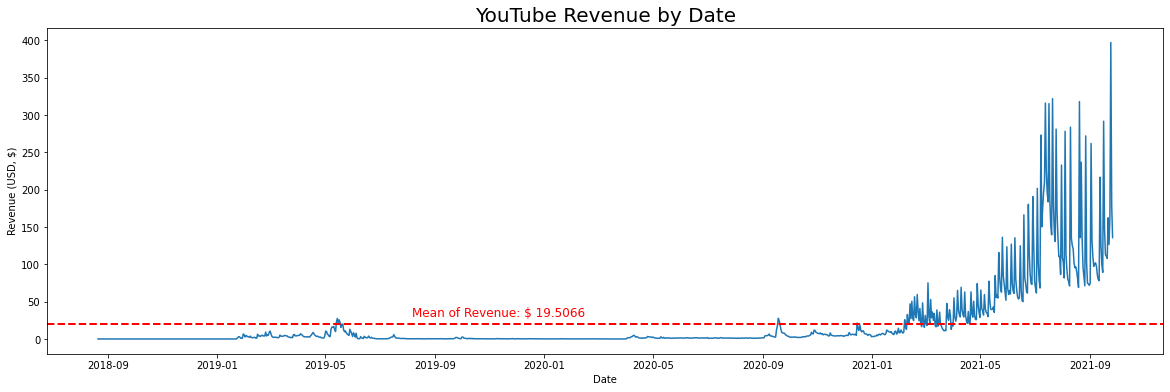

In [21]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=df, x='Date', y='Revenue')
plt.axhline(df['Revenue'].mean(), color='r', linestyle='--', linewidth=2)
plt.annotate('Mean of Revenue: $ {}'.format(round(df['Revenue'].mean(),4)), 
             (df.Date[350], 30), 
             fontsize=12, 
             color='r')
plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.show()

#### Filtering the data

In [38]:
df = df[(df['Date'] > '20200901')].reset_index(drop=True)

#### Distribution of features

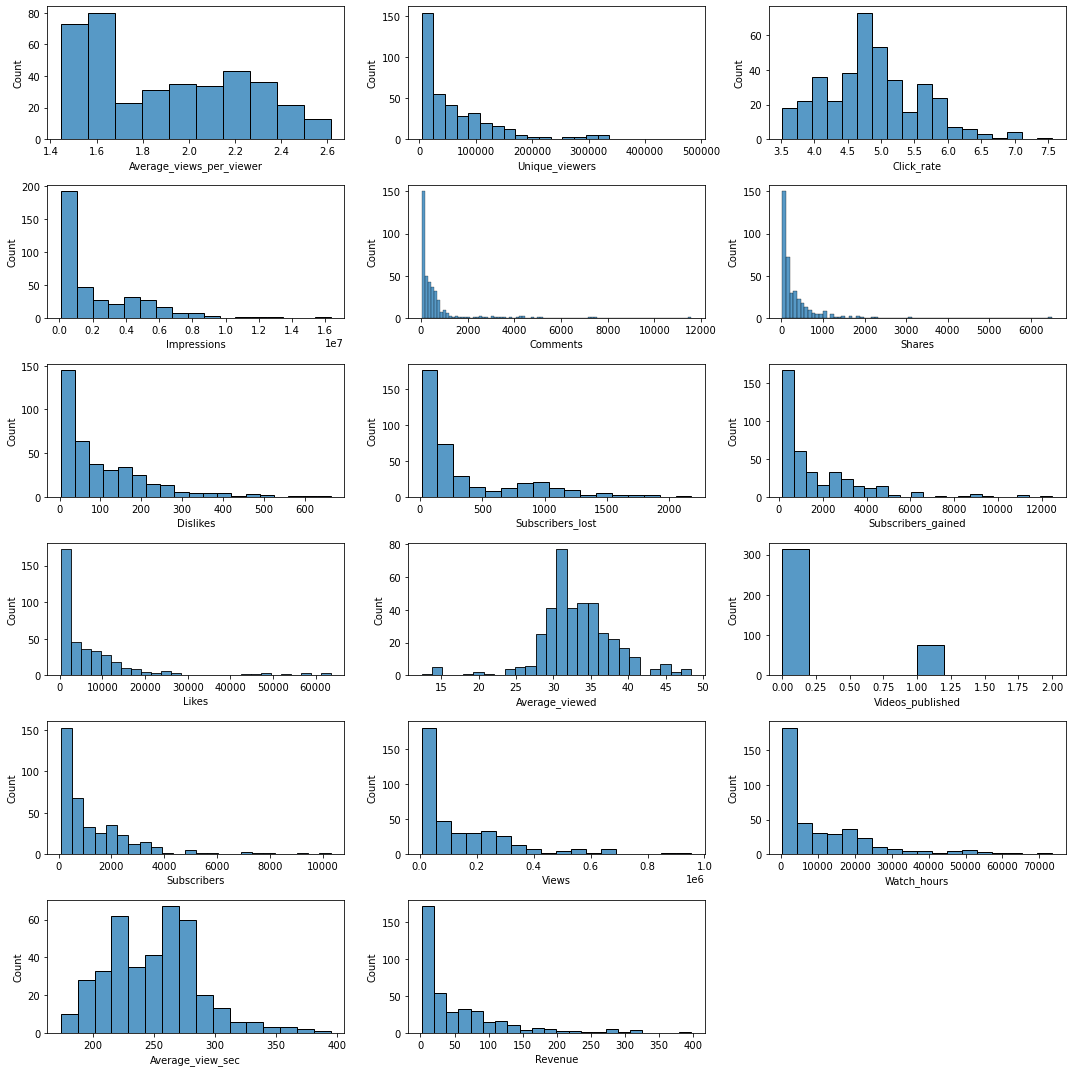

In [51]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
axes = axes.flatten()

features = [col for col in df.columns if col != 'Date']

for i, feature in enumerate(features ):    
    sns.histplot(df[feature], ax=axes[i])    
    axes[i].set_xlabel(feature)
    
if len(features) < 18:    
    for j in range(len(features), 18):        
        fig.delaxes(axes[j])   
        
fig.tight_layout()
plt.show()

#### Correlation of features with Revenue

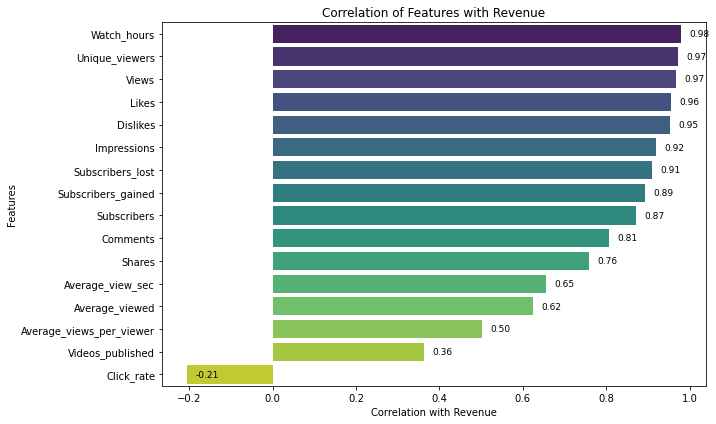

In [39]:
corr_sorted = df.corr()['Revenue'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x=corr_sorted.values[1:], y=corr_sorted.index[1:], palette='viridis', orient='horizontal')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Features')
plt.title('Correlation of Features with Revenue')
plt.tight_layout()

for i, v in enumerate(corr_sorted.values[1:]):
    barplot.text(v + 0.02, i, f'{v:.2f}', va='center', color='black', fontsize=9)

plt.show()

#### Revenue by watch hours

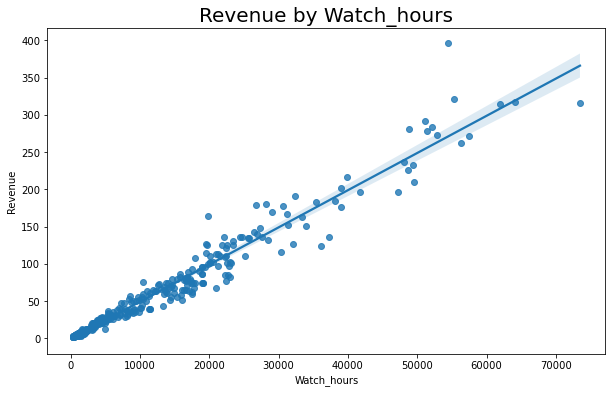

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Watch_hours', y='Revenue')
plt.title('Revenue by Watch_hours', fontsize=20)
plt.show()

### Outlier Handling

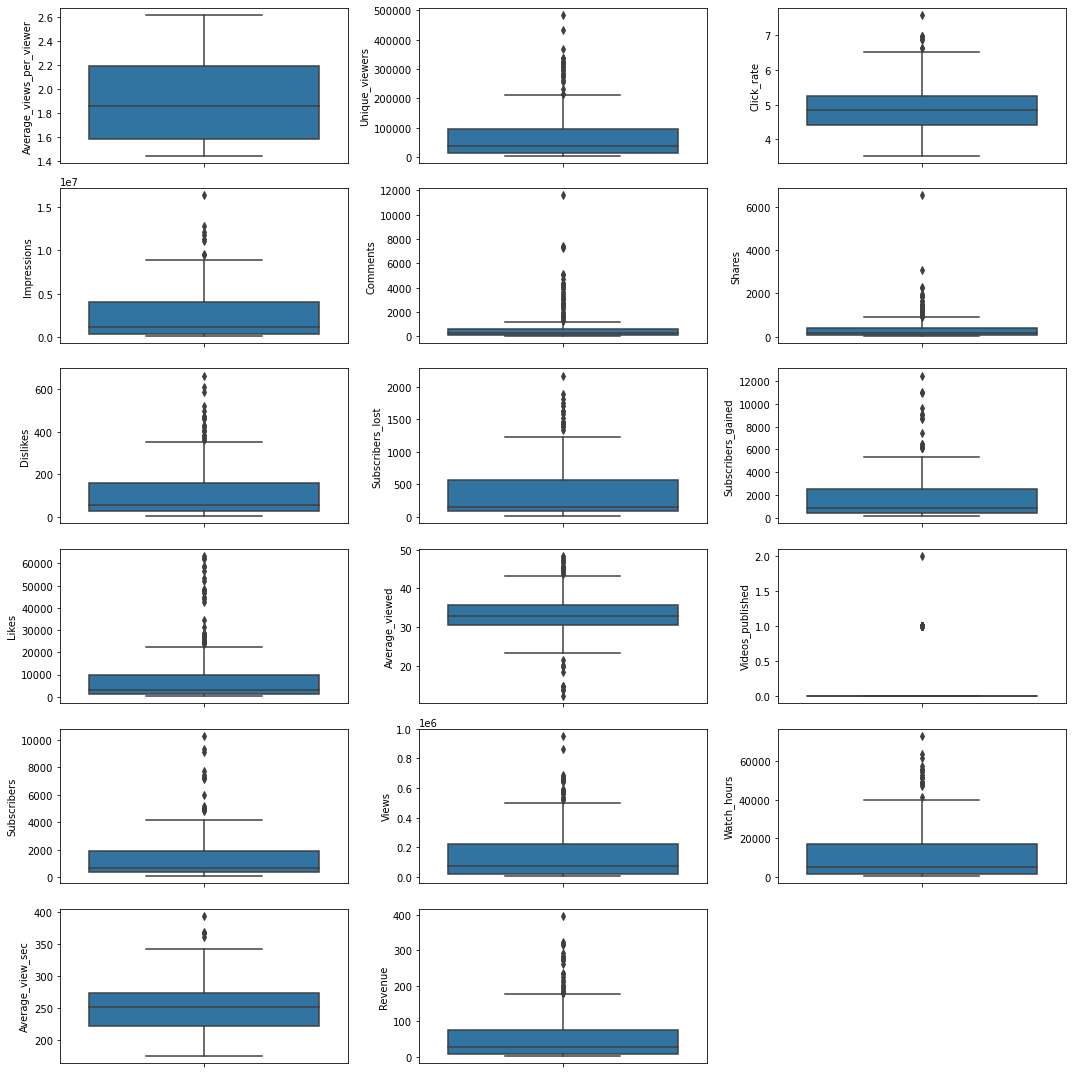

In [45]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(features):
    plt.subplot(6, 3, i+1)  
    sns.boxplot(data = df, y=feature)
    
plt.tight_layout()
plt.show()

In [52]:
variables = ['Unique_viewers', 'Click_rate','Impressions', 'Comments', 'Shares', 'Dislikes', 'Subscribers_lost',
             'Subscribers_gained', 'Likes', 'Average_viewed', 'Videos_published',
             'Subscribers', 'Views', 'Watch_hours', 'Average_view_sec', 'Revenue']
    
for var in variables:
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    lower_bridge = df[var].quantile(0.25) - (IQR * 1.5)
    upper_bridge = df[var].quantile(0.75) + (IQR * 1.5)

    df = df[(df[var] >= lower_bridge) & (df[var] <= upper_bridge)]

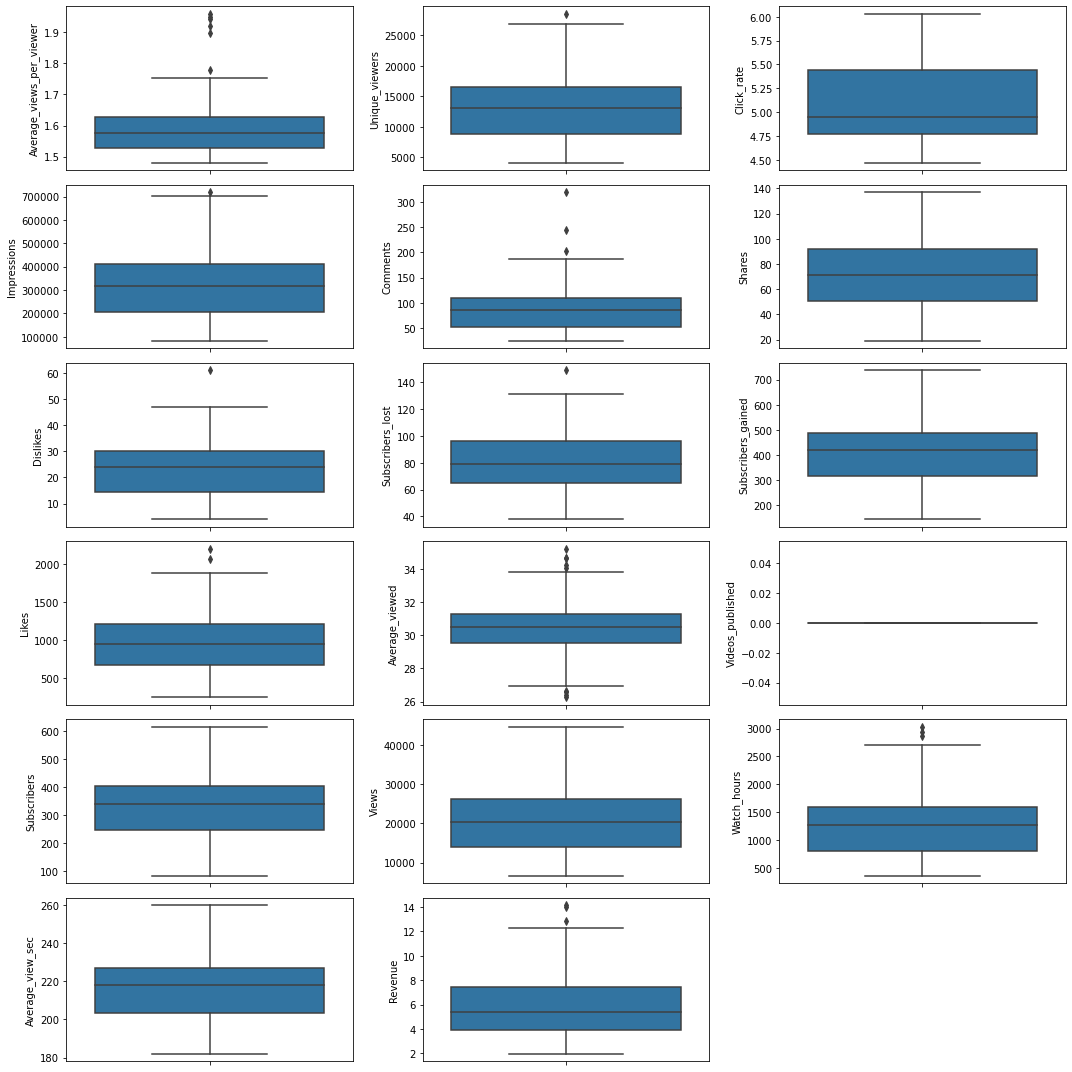

In [53]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(features):
    plt.subplot(6, 3, i+1)  
    sns.boxplot(data = df, y=feature)
    
plt.tight_layout()
plt.show()